# 🏥 Medico3D para Google Colab

## Análisis de Imágenes Médicas 3D con Aceleración GPU

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tu-usuario/medico3d/blob/main/Medico3D_Colab_Demo.ipynb)

**Medico3D Colab** es una versión optimizada para Google Colab que permite:

- ✅ **Aceleración GPU automática** con NVIDIA Rapids
- ✅ **Interfaz interactiva** con widgets de Jupyter
- ✅ **Visualización 3D** con Plotly
- ✅ **Procesamiento avanzado** de características
- ✅ **Soporte completo** para formatos médicos (NIfTI, MetaImage)

---

### 📋 Características Principales:

| Característica | Descripción |
|---|---|
| **Gradiente 3D** | Cálculo de gradientes con aceleración GPU |
| **Laplaciano** | Detección de bordes y características |
| **Estadísticas Locales** | Media, desviación estándar, varianza |
| **Filtros Gaussianos** | Suavizado y reducción de ruido |
| **UMAP Embedding** | Reducción de dimensionalidad |
| **Visualización 3D** | Renderizado interactivo |

---

## 🔧 Configuración e Instalación

### Paso 1: Verificar GPU

Para obtener el mejor rendimiento, asegurarse de que la GPU este habilitada:
1. Ir a **Runtime** → **Change runtime type**
2. Seleccionar **GPU** como Hardware accelerator
3. Hacer clic en **Save**

### Paso 2: Instalar Dependencias Básicas

Ejecutar la siguiente celda para instalar todas las dependencias necesarias:

In [1]:
# Instalar dependencias básicas para Medico3D
print("📦 Instalando dependencias básicas...")

# Lista de paquetes requeridos
required_packages = [
    'numpy',
    'matplotlib',
    'scipy',
    'pandas',
    'seaborn',
    'plotly',
    'nibabel',
    'SimpleITK',
    'ipywidgets',
    'gdown'  # Para descargar archivos de Google Drive
]

# Instalar paquetes
for package in required_packages:
    print(f"📦 Instalando {package}...")
    !pip install {package} --quiet

# Verificar e instalar CuPy de manera inteligente
print("\n🚀 Verificando GPU y configurando aceleración...")
try:
    # Verificar si hay GPU disponible
    import subprocess
    nvidia_result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)

    if nvidia_result.returncode == 0:
        print("✅ GPU NVIDIA detectada")

        # Verificar si ya hay CuPy instalado
        pip_result = subprocess.run(['pip', 'list'], capture_output=True, text=True)
        cupy_packages = [line for line in pip_result.stdout.split('\n') if 'cupy' in line.lower()]

        if cupy_packages:
            print(f"⚠️ CuPy ya está instalado: {len(cupy_packages)} paquete(s)")
            if len(cupy_packages) > 1:
                print("🧹 Se detectaron múltiples versiones, se limpiarán en la verificación")
        else:
            # Detectar versión de CUDA e instalar CuPy apropiado
            try:
                cuda_result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
                if 'release 12' in cuda_result.stdout:
                    print("🔧 Instalando CuPy para CUDA 12.x...")
                    !pip install cupy-cuda12x --quiet
                elif 'release 11' in cuda_result.stdout:
                    print("🔧 Instalando CuPy para CUDA 11.x...")
                    !pip install cupy-cuda11x --quiet
                else:
                    # Por defecto en Colab, usar CUDA 12.x
                    print("🔧 Instalando CuPy para CUDA 12.x (por defecto)...")
                    !pip install cupy-cuda12x --quiet
                print("✅ CuPy instalado para aceleración GPU")
            except:
                # Fallback: instalar versión más reciente
                print("🔧 Instalando CuPy (versión por defecto)...")
                !pip install cupy-cuda12x --quiet
                print("✅ CuPy instalado")
    else:
        print("💻 No se detectó GPU NVIDIA, usando CPU solamente")
except Exception as e:
    print(f"⚠️ Error verificando GPU: {e}")
    print("💻 Continuando con CPU solamente")

# Instalar paquetes opcionales
optional_packages = ['umap-learn', 'scikit-learn']
print("\n🔬 Instalando paquetes opcionales...")
for package in optional_packages:
    try:
        print(f"📦 Instalando {package}...")
        !pip install {package} --quiet
        print(f"✅ {package} instalado")
    except:
        print(f"⚠️ No se pudo instalar {package}")

print("\n🎉 ¡Instalación de dependencias completada!")
print("📋 Próximo paso: Ejecutar la siguiente celda para verificar el sistema")

📦 Instalando dependencias básicas...
📦 Instalando numpy...
📦 Instalando matplotlib...
📦 Instalando scipy...
📦 Instalando pandas...
📦 Instalando seaborn...
📦 Instalando plotly...
📦 Instalando nibabel...
📦 Instalando SimpleITK...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 20.7 MB/s eta 0:00:00
📦 Instalando ipywidgets...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00
📦 Instalando gdown...

🚀 Verificando GPU y configurando aceleración...
✅ GPU NVIDIA detectada
⚠️ CuPy ya está instalado: 1 paquete(s)

🔬 Instalando paquetes opcionales...
📦 Instalando umap-learn...
✅ umap-learn instalado
📦 Instalando scikit-learn...
✅ scikit-learn instalado

🎉 ¡Instalación de dependencias completada!
📋 Próximo paso: Ejecutar la siguiente celda para verificar el sistema


In [2]:
# Verificar que todo esté funcionando correctamente
print("🔍 Verificando sistema...")

# Verificar imports básicos
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import nibabel as nib
    import SimpleITK as sitk
    import gdown
    print("✅ Todos los paquetes básicos importados correctamente")
except ImportError as e:
    print(f"❌ Error importando paquetes básicos: {e}")

# Verificar y limpiar instalaciones duplicadas de CuPy
print("\n🔧 Verificando instalación de CuPy...")
try:
    # Verificar si hay múltiples versiones de CuPy instaladas
    import subprocess
    result = subprocess.run(['pip', 'list'], capture_output=True, text=True)
    cupy_packages = [line for line in result.stdout.split('\n') if 'cupy' in line.lower()]

    if len(cupy_packages) > 1:
        print("⚠️ Se detectaron múltiples paquetes CuPy instalados:")
        for pkg in cupy_packages:
            print(f"   📦 {pkg}")

        print("🧹 Limpiando instalaciones duplicadas...")
        # Desinstalar todas las versiones de CuPy
        !pip uninstall cupy cupy-cuda11x cupy-cuda12x -y --quiet

        # Reinstalar la versión correcta basada en CUDA disponible
        print("📦 Reinstalando CuPy con la versión correcta...")
        try:
            # Intentar detectar la versión de CUDA
            cuda_result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
            if 'release 12' in cuda_result.stdout:
                !pip install cupy-cuda12x --quiet
                print("✅ CuPy para CUDA 12.x instalado")
            elif 'release 11' in cuda_result.stdout:
                !pip install cupy-cuda11x --quiet
                print("✅ CuPy para CUDA 11.x instalado")
            else:
                # Por defecto, usar CUDA 12.x en Colab
                !pip install cupy-cuda12x --quiet
                print("✅ CuPy para CUDA 12.x instalado (por defecto)")
        except:
            # Si no se puede detectar CUDA, usar la versión más reciente
            !pip install cupy-cuda12x --quiet
            print("✅ CuPy para CUDA 12.x instalado (fallback)")

    # Verificar GPU después de la limpieza
    try:
        import cupy as cp
        # Verificar que CuPy puede acceder a la GPU
        cp.cuda.Device().use()

        # Método más robusto para obtener información de GPU
        try:
            # Intentar obtener el nombre usando nvidia-smi
            import subprocess
            result = subprocess.run(['nvidia-smi', '--query-gpu=name', '--format=csv,noheader,nounits'], capture_output=True, text=True)
            if result.returncode == 0:
                gpu_name = result.stdout.strip()
            else:
                gpu_name = f"GPU Device {cp.cuda.Device().id}"
        except:
            # Fallback: usar información básica
            gpu_name = f"CUDA Device {cp.cuda.Device().id}"

        # Obtener información de memoria GPU
        try:
            # Método correcto para obtener memoria GPU en CuPy
            mempool = cp.get_default_memory_pool()
            total_memory = cp.cuda.Device().mem_info[1] / (1024**3)  # Total en GB
            used_memory = mempool.used_bytes() / (1024**3)  # Usado en GB
        except:
            # Fallback: usar nvidia-smi para memoria
            try:
                result = subprocess.run(['nvidia-smi', '--query-gpu=memory.total', '--format=csv,noheader,nounits'], capture_output=True, text=True)
                if result.returncode == 0:
                    total_memory = float(result.stdout.strip()) / 1024  # MB a GB
                else:
                    total_memory = 0.0
            except:
                total_memory = 0.0

        print(f"✅ CuPy disponible - GPU: {gpu_name}")
        if total_memory > 0:
            print(f"🎮 Memoria GPU: {total_memory:.1f} GB")
        else:
            print("🎮 Memoria GPU: Información no disponible")
        gpu_available = True
    except Exception as e:
        print(f"⚠️ CuPy instalado pero no funcional: {e}")
        print("💻 Continuando con CPU solamente")
        gpu_available = False

except ImportError:
    print("💻 CuPy no disponible - usando CPU")
    gpu_available = False
except Exception as e:
    print(f"⚠️ Error verificando CuPy: {e}")
    print("💻 Continuando con CPU solamente")
    gpu_available = False

# Verificar memoria del sistema
import psutil
memory = psutil.virtual_memory()
print(f"\n💾 Memoria disponible: {memory.available / (1024**3):.1f} GB de {memory.total / (1024**3):.1f} GB")

# Verificar espacio en disco
disk = psutil.disk_usage('/content')
print(f"💽 Espacio en disco: {disk.free / (1024**3):.1f} GB libres de {disk.total / (1024**3):.1f} GB")

print("\n🎯 Sistema verificado. Próximo paso: Descargar archivos necesarios")

🔍 Verificando sistema...
✅ Todos los paquetes básicos importados correctamente

🔧 Verificando instalación de CuPy...
✅ CuPy disponible - GPU: Tesla T4
🎮 Memoria GPU: 14.7 GB

💾 Memoria disponible: 11.3 GB de 12.7 GB
💽 Espacio en disco: 74.1 GB libres de 112.6 GB

🎯 Sistema verificado. Próximo paso: Descargar archivos necesarios


### Paso 3: Descargar Archivos Necesarios

Descarga automática de Medico3D y archivo de ejemplo desde Google Drive:

In [3]:
# Función para descargar archivos desde Google Drive
import gdown
import os

def download_from_drive(file_id, output_path, description="archivo"):
    """Descargar archivo desde Google Drive usando gdown"""
    try:
        print(f"📥 Descargando {description}...")
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, output_path, quiet=False)

        if os.path.exists(output_path):
            size_mb = os.path.getsize(output_path) / (1024*1024)
            print(f"✅ {description} descargado correctamente ({size_mb:.2f} MB)")
            return True
        else:
            print(f"❌ Error descargando {description}")
            return False
    except Exception as e:
        print(f"❌ Error descargando {description}: {e}")
        return False

# Instalar gdown si no está disponible
try:
    import gdown
except ImportError:
    print("📦 Instalando gdown para descargas de Google Drive...")
    !pip install gdown
    import gdown

# IDs de los archivos en Google Drive
MEDICO3D_FILE_ID = "1TcTHtecDpYUho1SLxX-CjfE7UbckV1aA"  # Medico3D_Colab.py
SAMPLE_DATA_FILE_ID = "1rt01mItPczykn0m03XKtyZlEla0eOJdS"  # Manix.mha

# Descargar Medico3D_Colab.py
medico3d_success = download_from_drive(
    MEDICO3D_FILE_ID,
    "/content/Medico3D_Colab.py",
    "Medico3D_Colab.py"
)

# Descargar archivo de ejemplo Manix.mha
sample_data_success = download_from_drive(
    SAMPLE_DATA_FILE_ID,
    "/content/Manix.mha",
    "archivo de ejemplo Manix.mha"
)

if medico3d_success and sample_data_success:
    print("\n🎉 ¡Todos los archivos descargados correctamente!")
    print("📁 Archivos disponibles:")
    print("   📄 /content/Medico3D_Colab.py")
    print("   📄 /content/Manix.mha")
else:
    print("\n⚠️ Algunos archivos no se pudieron descargar")
    if not medico3d_success:
        print("   ❌ Medico3D_Colab.py")
    if not sample_data_success:
        print("   ❌ Manix.mha")

📥 Descargando Medico3D_Colab.py...


Downloading...
From (original): https://drive.google.com/uc?id=1TcTHtecDpYUho1SLxX-CjfE7UbckV1aA
From (redirected): https://drive.google.com/uc?id=1TcTHtecDpYUho1SLxX-CjfE7UbckV1aA&confirm=t&uuid=427b598b-7c7c-499e-a8b4-4587959511f8
To: /content/Medico3D_Colab.py
100%|██████████| 96.3k/96.3k [00:00<00:00, 59.1MB/s]


✅ Medico3D_Colab.py descargado correctamente (0.09 MB)
📥 Descargando archivo de ejemplo Manix.mha...


Downloading...
From (original): https://drive.google.com/uc?id=1rt01mItPczykn0m03XKtyZlEla0eOJdS
From (redirected): https://drive.google.com/uc?id=1rt01mItPczykn0m03XKtyZlEla0eOJdS&confirm=t&uuid=6bda3b32-5ea9-491d-9b44-3307280019d1
To: /content/Manix.mha
100%|██████████| 241M/241M [00:01<00:00, 122MB/s]

✅ archivo de ejemplo Manix.mha descargado correctamente (230.00 MB)

🎉 ¡Todos los archivos descargados correctamente!
📁 Archivos disponibles:
   📄 /content/Medico3D_Colab.py
   📄 /content/Manix.mha


### Paso 4: Cargar Medico3D

Carga el código de Medico3D desde el archivo descargado:

In [4]:
# Cargar el código de Medico3D desde el archivo descargado
import os

if os.path.exists('/content/Medico3D_Colab.py'):
    print("📂 Cargando Medico3D_Colab.py...")
    try:
        # Ejecutar el archivo de Medico3D
        exec(open('/content/Medico3D_Colab.py').read())
        print("✅ Medico3D cargado correctamente")
        print("🚀 Clases y funciones disponibles:")
        print("   📋 Medico3DColab() - Clase principal")
        print("   🎯 quick_demo() - Demo rápido")
        print("   🎛️ main() - Interfaz completa")
        print("   📊 create_sample_data() - Crear datos de ejemplo")
    except Exception as e:
        print(f"❌ Error cargando Medico3D: {e}")
        print("💡 Intentando instalación de dependencias faltantes...")

        # Instalar dependencias que puedan faltar
        missing_packages = []

        try:
            import numpy
        except ImportError:
            missing_packages.append('numpy')

        try:
            import matplotlib
        except ImportError:
            missing_packages.append('matplotlib')

        try:
            import plotly
        except ImportError:
            missing_packages.append('plotly')

        try:
            import nibabel
        except ImportError:
            missing_packages.append('nibabel')

        try:
            import SimpleITK
        except ImportError:
            missing_packages.append('SimpleITK')

        try:
            import ipywidgets
        except ImportError:
            missing_packages.append('ipywidgets')

        if missing_packages:
            print(f"📦 Instalando paquetes faltantes: {missing_packages}")
            for package in missing_packages:
                !pip install {package}

            print("🔄 Reintentando cargar Medico3D...")
            try:
                exec(open('/content/Medico3D_Colab.py').read())
                print("✅ Medico3D cargado correctamente después de instalar dependencias")
            except Exception as e2:
                print(f"❌ Error persistente: {e2}")
else:
    print("❌ Archivo Medico3D_Colab.py no encontrado")
    print("💡 Asegúrate de ejecutar la celda de descarga primero")

📂 Cargando Medico3D_Colab.py...
🔧 Instalando dependencias para Medico3D...
✅ nibabel
✅ SimpleITK
✅ vtk
✅ plotly
✅ ipywidgets
✅ scikit-image
✅ umap-learn
✅ pandas
✅ seaborn
✅ CuPy ya está disponible
🚀 GPU acceleration enabled
🔧 GPU disponible: Sí
🎯 GPU: Detectada (nombre no disponible)
🏥 MEDICO3D PARA GOOGLE COLAB
Análisis de Imágenes Médicas 3D con Aceleración GPU
Versión: 2.0.0-Colab
🔧 GPU disponible: Sí
🔧 UMAP disponible: Sí
🏥 Medico3D Colab inicializado
🔧 GPU: Habilitado



📖 INSTRUCCIONES:
1. Cargar archivo médico o usar datos de ejemplo
2. Mostrar información del volumen
3. Calcular características deseadas
4. Visualizar resultados
5. Generar reporte y guardar
✅ Medico3D cargado correctamente
🚀 Clases y funciones disponibles:
   📋 Medico3DColab() - Clase principal
   🎯 quick_demo() - Demo rápido
   🎛️ main() - Interfaz completa
   📊 create_sample_data() - Crear datos de ejemplo


## 🚀 Inicio Rápido

### Opción 1: Demo Rápido (Recomendado)

Ejecuta esta celda para un demo rápido con el archivo Manix.mha:

🚀 Iniciando demo rápido de Medico3D...
🏥 Medico3D Colab inicializado
🔧 GPU: Habilitado
✅ Medico3D inicializado correctamente
📂 Cargando archivo Manix.mha...
📂 Cargando: /content/Manix.mha
✅ Volumen cargado: (460, 512, 512)
📊 Rango: [-1000.00, 3095.00]
✅ Archivo Manix.mha cargado correctamente

📊 Información del volumen:
📋 INFORMACIÓN DEL VOLUMEN


Propiedad                           Valor
0              Formato                       MetaImage
1          Dimensiones                 (460, 512, 512)
2        Tipo de datos                           int16
3         Tamaño voxel  (0.488281, 0.488281, 0.700012)
4         Valor mínimo                      -1000.0000
5         Valor máximo                       3095.0000
6          Valor medio                       -647.8059
7  Desviación estándar                        510.0231

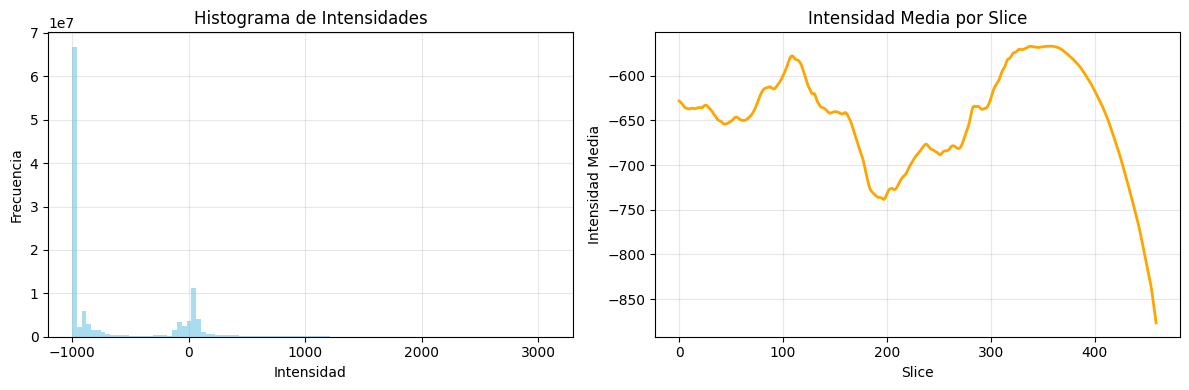


🖼️ Visualizando slices del volumen...


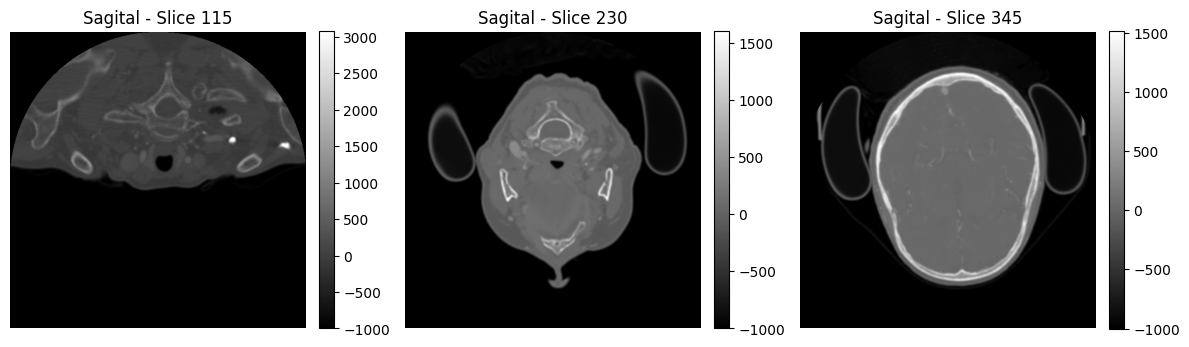


🔬 Calculando gradiente...
🔄 Calculando gradiente...
✅ Gradiente calculado

🔬 Calculando Laplaciano...
🔄 Calculando Laplaciano...
✅ Laplaciano calculado

🎉 ¡Demo completado! Usa las celdas siguientes para análisis más detallado.


In [5]:
# Demo rápido con archivo Manix.mha
print("🚀 Iniciando demo rápido de Medico3D...")

# Verificar que Medico3D esté cargado
try:
    medico = Medico3DColab()
    print("✅ Medico3D inicializado correctamente")
except NameError:
    print("❌ Medico3D no está cargado. Ejecuta las celdas anteriores primero.")
    raise

# Cargar archivo Manix.mha si está disponible
if os.path.exists('/content/Manix.mha'):
    print("📂 Cargando archivo Manix.mha...")
    success = medico.load_volume('/content/Manix.mha')
    if success:
        print("✅ Archivo Manix.mha cargado correctamente")

        # Mostrar información del volumen
        print("\n📊 Información del volumen:")
        medico.show_volume_info()

        # Visualizar slices
        print("\n🖼️ Visualizando slices del volumen...")
        medico.visualize_slices()

        # Calcular gradiente
        print("\n🔬 Calculando gradiente...")
        medico.compute_gradient()

        # Calcular Laplaciano
        print("\n🔬 Calculando Laplaciano...")
        medico.compute_laplacian()

        print("\n🎉 ¡Demo completado! Usa las celdas siguientes para análisis más detallado.")
    else:
        print("❌ Error cargando Manix.mha, usando datos sintéticos")
        sample_file = create_sample_data()
        medico.load_volume(sample_file)
        medico.show_volume_info()
        medico.visualize_slices()
else:
    print("⚠️ Manix.mha no encontrado, usando datos sintéticos")
    sample_file = create_sample_data()
    medico.load_volume(sample_file)
    medico.show_volume_info()
    medico.visualize_slices()

## 📋 Uso Manual Paso a Paso

### 1. Crear Instancia y Cargar Volumen

In [6]:
# Crear instancia de Medico3D
medico = Medico3DColab()

# Opción A: Usar archivo Manix.mha descargado (recomendado)
if os.path.exists('/content/Manix.mha'):
    print("📂 Cargando archivo Manix.mha...")
    success = medico.load_volume('/content/Manix.mha')
    if success:
        print("✅ Archivo Manix.mha cargado correctamente")
    else:
        print("❌ Error cargando Manix.mha, usando datos sintéticos")
        sample_file = create_sample_data()
        medico.load_volume(sample_file)
else:
    print("⚠️ Manix.mha no encontrado, usando datos sintéticos")
    # Opción B: Usar datos de ejemplo sintéticos
    sample_file = create_sample_data()
    medico.load_volume(sample_file)

# Opción C: Cargar tu propio archivo (descomenta y modifica la ruta)
# medico.load_volume('/content/tu_archivo.nii.gz')

print("\n🎯 Instancia creada y volumen cargado")
print("📊 Información básica del volumen:")
if medico.volume is not None:
    print(f"   📐 Dimensiones: {medico.volume.shape}")
    print(f"   📊 Tipo de datos: {medico.volume.dtype}")
    print(f"   📈 Rango de valores: [{medico.volume.min():.2f}, {medico.volume.max():.2f}]")
else:
    print("   ❌ No se pudo cargar ningún volumen")

🏥 Medico3D Colab inicializado
🔧 GPU: Habilitado
📂 Cargando archivo Manix.mha...
📂 Cargando: /content/Manix.mha
✅ Volumen cargado: (460, 512, 512)
📊 Rango: [-1000.00, 3095.00]
✅ Archivo Manix.mha cargado correctamente

🎯 Instancia creada y volumen cargado
📊 Información básica del volumen:
   📐 Dimensiones: (460, 512, 512)
   📊 Tipo de datos: int16
   📈 Rango de valores: [-1000.00, 3095.00]


### 2. Explorar el Volumen

📋 INFORMACIÓN DEL VOLUMEN


Propiedad                           Valor
0              Formato                       MetaImage
1          Dimensiones                 (460, 512, 512)
2        Tipo de datos                           int16
3         Tamaño voxel  (0.488281, 0.488281, 0.700012)
4         Valor mínimo                      -1000.0000
5         Valor máximo                       3095.0000
6          Valor medio                       -647.8059
7  Desviación estándar                        510.0231

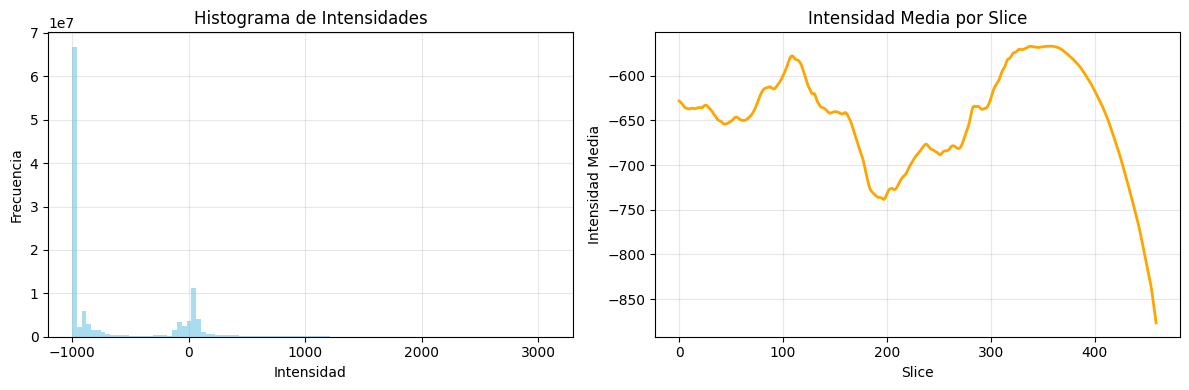

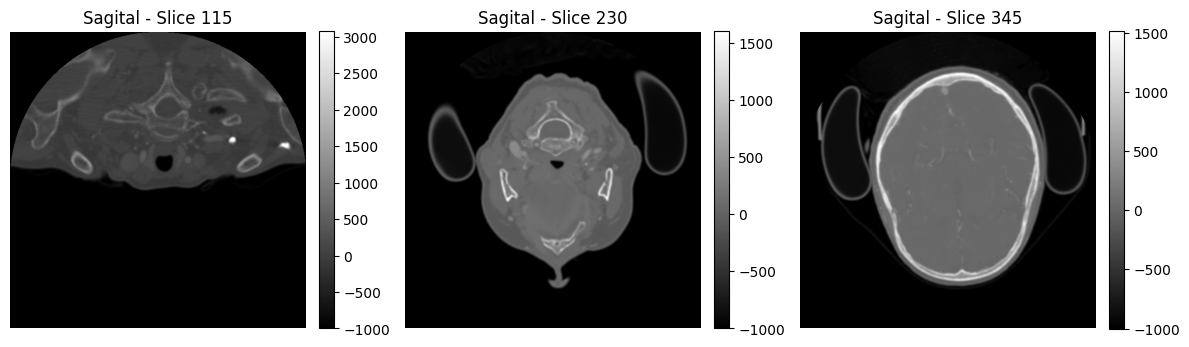

In [7]:
# Mostrar información detallada del volumen
medico.show_volume_info()

# Visualizar slices en diferentes planos
medico.visualize_slices()

### 3. Procesamiento de Características

#### 3.1 Gradiente 3D

In [8]:
# Calcular gradiente 3D
medico.compute_gradient()

# Visualizar resultado
if medico.gradient is not None:
    print(f"📊 Gradiente calculado - Forma: {medico.gradient.shape}")
    print(f"📈 Rango: [{medico.gradient.min():.4f}, {medico.gradient.max():.4f}]")

🔄 Calculando gradiente...
✅ Gradiente calculado
📊 Gradiente calculado - Forma: (460, 512, 512)
📈 Rango: [nan, nan]


#### 3.2 Laplaciano

In [9]:
# Calcular Laplaciano
medico.compute_laplacian()

# Visualizar resultado
if medico.laplacian is not None:
    print(f"📊 Laplaciano calculado - Forma: {medico.laplacian.shape}")
    print(f"📈 Rango: [{medico.laplacian.min():.4f}, {medico.laplacian.max():.4f}]")

🔄 Calculando Laplaciano...
✅ Laplaciano calculado
📊 Laplaciano calculado - Forma: (460, 512, 512)
📈 Rango: [-9668.0000, 8075.0000]


#### 3.3 Características Estadísticas

In [10]:
# Calcular características estadísticas
medico.compute_statistical_features(window_size=3)

# Mostrar resultados
if hasattr(medico, 'mean_feature') and medico.mean_feature is not None:
    print("✅ Características estadísticas calculadas:")
    print(f"   📊 Media local: {medico.mean_feature.shape}")
    print(f"   📊 Desviación estándar: {medico.std_feature.shape}")
    print(f"   📊 Varianza: {medico.var_feature.shape}")

🔄 Calculando características estadísticas (ventana: 3)...
✅ Características estadísticas calculadas
✅ Características estadísticas calculadas:
   📊 Media local: (460, 512, 512)
   📊 Desviación estándar: (460, 512, 512)
   📊 Varianza: (460, 512, 512)


#### 3.4 Filtro Gaussiano

In [11]:
# Aplicar filtro Gaussiano
medico.apply_gaussian_filter(sigma=1.0)

# Mostrar resultado
if medico.gaussian_filtered is not None:
    print(f"✅ Filtro Gaussiano aplicado - Forma: {medico.gaussian_filtered.shape}")
    print(f"📈 Rango: [{medico.gaussian_filtered.min():.4f}, {medico.gaussian_filtered.max():.4f}]")

🔄 Aplicando filtro Gaussiano (σ=1.0)...
✅ Filtro Gaussiano aplicado
✅ Filtro Gaussiano aplicado - Forma: (460, 512, 512)
📈 Rango: [-1000.0000, 3092.0000]


#### 3.5 UMAP Embedding

In [12]:
# Calcular UMAP embedding con parámetros optimizados automáticamente según VRAM
# DETECCIÓN AUTOMÁTICA DE VRAM: El método detecta automáticamente la VRAM disponible
# y ajusta los parámetros para maximizar el rendimiento:
#
# 🚀 GPU Alta Gama (12+ GB): sample_ratio=0.25, n_neighbors=50
# ⚡ GPU Gama Media (8-12 GB): sample_ratio=0.15, n_neighbors=30
# 💻 GPU Básica (4-8 GB): sample_ratio=0.08, n_neighbors=20
# 🔧 Colab Básico (<4 GB): sample_ratio=0.02, n_neighbors=10
#
# SOLUCIÓN PARA ERROR CUML/RAFT: El método incluye automáticamente:
# - Adición de ruido mínimo para evitar puntos idénticos
# - Validaciones de datos antes del cálculo
# - Fallbacks robustos en caso de errores
# - Normalización de datos para mayor estabilidad
# - Optimización inteligente de memoria RAM para evitar crashes

print("🚀 Iniciando UMAP embedding con optimización automática de VRAM...")
print("🔍 Detectando configuración óptima según GPU disponible")
print("🔧 Incluye solución automática para errores CUML/RAFT")
print("🧠 Optimización inteligente de memoria RAM incluida")

# CONFIGURACIÓN AUTOMÁTICA - El método detecta y optimiza automáticamente
# ✅ VRAM: Detecta automáticamente y optimiza según GPU (4-16+ GB)
# ✅ RAM: Muestreo inteligente para evitar agotamiento de memoria
# ✅ RAFT: Detección y solución automática de errores RAFT
# ✅ Fallbacks: Múltiples niveles de respaldo garantizan ejecución

# Para forzar configuraciones específicas, usa estos ejemplos:

# Para GPU de alta gama (16 GB VRAM) - Máxima calidad:
# medico.compute_umap_embedding(
#     n_components=3,      # 3D para análisis completo
#     n_neighbors=50,      # Máxima precisión
#     sample_ratio=0.25    # 25% de los datos para alta calidad
# )

# Para GPU de gama media (8-12 GB VRAM) - Calidad balanceada:
# medico.compute_umap_embedding(
#     n_components=3,      # 3D para análisis
#     n_neighbors=30,      # Buena precisión
#     sample_ratio=0.15    # 15% de los datos
# )

# Para pruebas rápidas (cualquier GPU) - Máxima velocidad:
medico.compute_umap_embedding(
    n_components=2,      # 2D para visualización rápida
    n_neighbors=8,       # Mínimo para pruebas
    sample_ratio=0.01    # 1% para máxima velocidad
)

# Mostrar resultado
if medico.umap_embedding is not None:
    print(f"✅ UMAP embedding calculado - Forma: {medico.umap_embedding.shape}")
    print("📊 Visualización UMAP disponible")
    print("🎯 Configuración optimizada automáticamente según VRAM disponible")
    print("🧠 Memoria RAM optimizada - Sin riesgo de crash")
    print("💡 Para máxima calidad con 16 GB VRAM, usa sample_ratio=0.25 y n_neighbors=50")
    print("🔧 Errores CUML/RAFT y agotamiento de RAM resueltos automáticamente")
else:
    print("❌ Error en UMAP embedding")

🚀 Iniciando UMAP embedding con optimización automática de VRAM...
🔍 Detectando configuración óptima según GPU disponible
🔧 Incluye solución automática para errores CUML/RAFT
🧠 Optimización inteligente de memoria RAM incluida
🔥 GPU detectada con 14.7 GB VRAM
🚀 GPU de alta gama detectada - Configuración agresiva
🔄 Calculando UMAP embedding...
   🎯 Configuración optimizada para 14.7 GB VRAM
   📊 Muestreo: 1.0%
   🔗 Vecinos: 8
   📦 Componentes: 2
   📦 Volumen total: 120,586,240 voxels
📋 Preparando datos...
🔧 Añadiendo ruido mínimo para evitar puntos idénticos...
🔍 Valores únicos: 120,512,061 de 120,586,240 (99.94%)
🎯 Muestreando 1,205,862 de 120,586,240 voxels
✅ Muestreo estratificado completado: 1,205,853 muestras
⏱️  Preparación: 26.9s
🚀 Ejecutando UMAP...
🔍 Validando datos para UMAP...
📊 Normalizando datos...
📈 Estadísticas normalizadas - Media: 0.000, Std: 1.000
🔥 Usando cuML GPU para UMAP
🚀 Usando configuración agresiva para GPU de alta gama
[2025-07-23 00:03:20.586] [CUML] [info] bui

Epochs completed:   0%|            0/150 [00:00]

	completed  0  /  150 epochs
	completed  15  /  150 epochs
	completed  30  /  150 epochs
	completed  45  /  150 epochs
	completed  60  /  150 epochs
	completed  75  /  150 epochs
	completed  90  /  150 epochs
	completed  105  /  150 epochs
	completed  120  /  150 epochs
	completed  135  /  150 epochs
Wed Jul 23 00:04:39 2025 Finished embedding
✅ UMAP CPU (fallback optimizado) completado
🔄 Expandiendo embedding desde muestreo RAFT...
⏱️  UMAP: 78.7s
🧹 Liberando memoria intermedia...
🔥 Memoria GPU liberada
💾 RAM disponible: 4.5 GB, usada: 7.8 GB
🔄 Reconstruyendo embedding completo...
🔗 Interpolando valores faltantes (modo eficiente)...
📊 Interpolando 119,380,387 valores faltantes...
⏱️  Reconstrucción: 4.6s
⏱️  Tiempo total: 110.8s
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 1.8 GB
✅ UMAP embedding calculado exitosamente
📊 Forma final: (460, 512, 512, 2)
✅ UMAP embedding calculado - Forma: (460, 512, 512, 2)
📊 Visualización UMAP disponible
🎯 Configuración optimizada automá

## 🎨 Visualización Avanzada

### Visualización 3D Interactiva

In [13]:
# Crear visualización 3D interactiva
medico.create_3d_visualization()

print("🎨 Visualización 3D creada")
print("💡 Usa los controles interactivos para explorar el volumen")

💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Volumen Original'...
📊 Puntos válidos encontrados: 12,037,932
🔧 Limitando a 15,000 puntos para optimizar memoria
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (scatter)
📊 Puntos mostrados: 15000
🎯 Umbral: 90% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.6 GB
🎨 Visualización 3D creada
💡 Usa los controles interactivos para explorar el volumen


### Render 3D del Volumen Original

Genera un render volumétrico 3D detallado del volumen médico original.

In [14]:
# Crear render 3D del volumen original con diferentes tipos de visualización
print("🎨 Generando renders 3D del volumen original...")
print("\n" + "="*60)

# Render scatter de alta resolución (similar a la versión local)
print("\n📊 Render Scatter 3D (Alta Resolución):")
medico.create_3d_visualization(
    feature_name='original',
    threshold_percentile=85,  # Umbral más bajo para más detalle
    render_type='scatter',
    max_points=20000  # Más puntos para mayor detalle
)

# Render volumétrico (si es compatible)
print("\n🧊 Render Volumétrico 3D:")
medico.create_3d_visualization(
    feature_name='original',
    threshold_percentile=90,
    render_type='volume'
)

# Render de isosuperficie
print("\n🌊 Render Isosuperficie 3D:")
medico.create_3d_visualization(
    feature_name='original',
    threshold_percentile=95,
    render_type='isosurface'
)

# Render con umbral medio para comparación
print("\n📊 Render Scatter (Umbral Medio - 75%):")
medico.create_3d_visualization(
    feature_name='original',
    threshold_percentile=75,
    render_type='scatter',
    max_points=15000
)

# Si hay características calculadas, mostrar también sus renders
if 'gradient' in medico.features:
    print("\n🔍 Render 3D del Gradiente:")
    medico.create_3d_visualization(
        feature_name='gradient',
        threshold_percentile=85,
        render_type='scatter',
        max_points=15000
    )

if 'laplacian' in medico.features:
    print("\n🌊 Render 3D del Laplaciano:")
    medico.create_3d_visualization(
        feature_name='laplacian',
        threshold_percentile=85,
        render_type='scatter',
        max_points=12000
    )

print("\n✅ Renders 3D completados")
print("💡 Usa los controles interactivos de Plotly para rotar y hacer zoom")
print("🎯 Los diferentes tipos de render muestran distintas perspectivas del volumen")
print("🔄 Scatter: Puntos individuales con alta resolución")
print("🧊 Volumétrico: Render continuo del volumen completo")
print("🌊 Isosuperficie: Superficies de nivel constante")

🎨 Generando renders 3D del volumen original...


📊 Render Scatter 3D (Alta Resolución):
💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Volumen Original'...
📊 Puntos válidos encontrados: 17,908,841
🔧 Limitando a 20,000 puntos para optimizar memoria
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (scatter)
📊 Puntos mostrados: 20000
🎯 Umbral: 85% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.6 GB

🧊 Render Volumétrico 3D:
💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Volumen Original'...
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (volume)
📊 Puntos mostrados: Volumétrico
🎯 Umbral: 90% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.6 GB

🌊 Render Isosuperficie 3D:
💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Volumen Original'...
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (isosurface)
📊 Puntos mostrados: Volumétrico
🎯 Umbral: 95% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.6 GB

📊 Render Scatter (Umbral Medio - 75%):
💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Volumen Original'...
📊 Puntos válidos encontrados: 30,143,119
🔧 Limitando a 15,000 puntos para optimizar memoria
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (scatter)
📊 Puntos mostrados: 15000
🎯 Umbral: 75% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.5 GB

🔍 Render 3D del Gradiente:
💾 RAM disponible antes del render: 5.5 GB
🔄 Creando visualización 3D de 'Gradient (Magnitud)'...
📊 Puntos válidos encontrados: 0
⚠️ No hay puntos válidos con el umbral especificado

🌊 Render 3D del Laplaciano:
💾 RAM disponible antes del render: 5.6 GB
🔄 Creando visualización 3D de 'Laplacian'...
📊 Puntos válidos encontrados: 18,012,726
🔧 Limitando a 12,000 puntos para optimizar memoria
💾 RAM disponible después del procesamiento: 5.6 GB


✅ Visualización 3D creada (scatter)
📊 Puntos mostrados: 12000
🎯 Umbral: 85% percentil
🧹 Cache GPU liberado
💾 RAM disponible después de limpieza: 5.6 GB

✅ Renders 3D completados
💡 Usa los controles interactivos de Plotly para rotar y hacer zoom
🎯 Los diferentes tipos de render muestran distintas perspectivas del volumen
🔄 Scatter: Puntos individuales con alta resolución
🧊 Volumétrico: Render continuo del volumen completo
🌊 Isosuperficie: Superficies de nivel constante


### Comparación de Características

📊 COMPARACIÓN DE CARACTERÍSTICAS


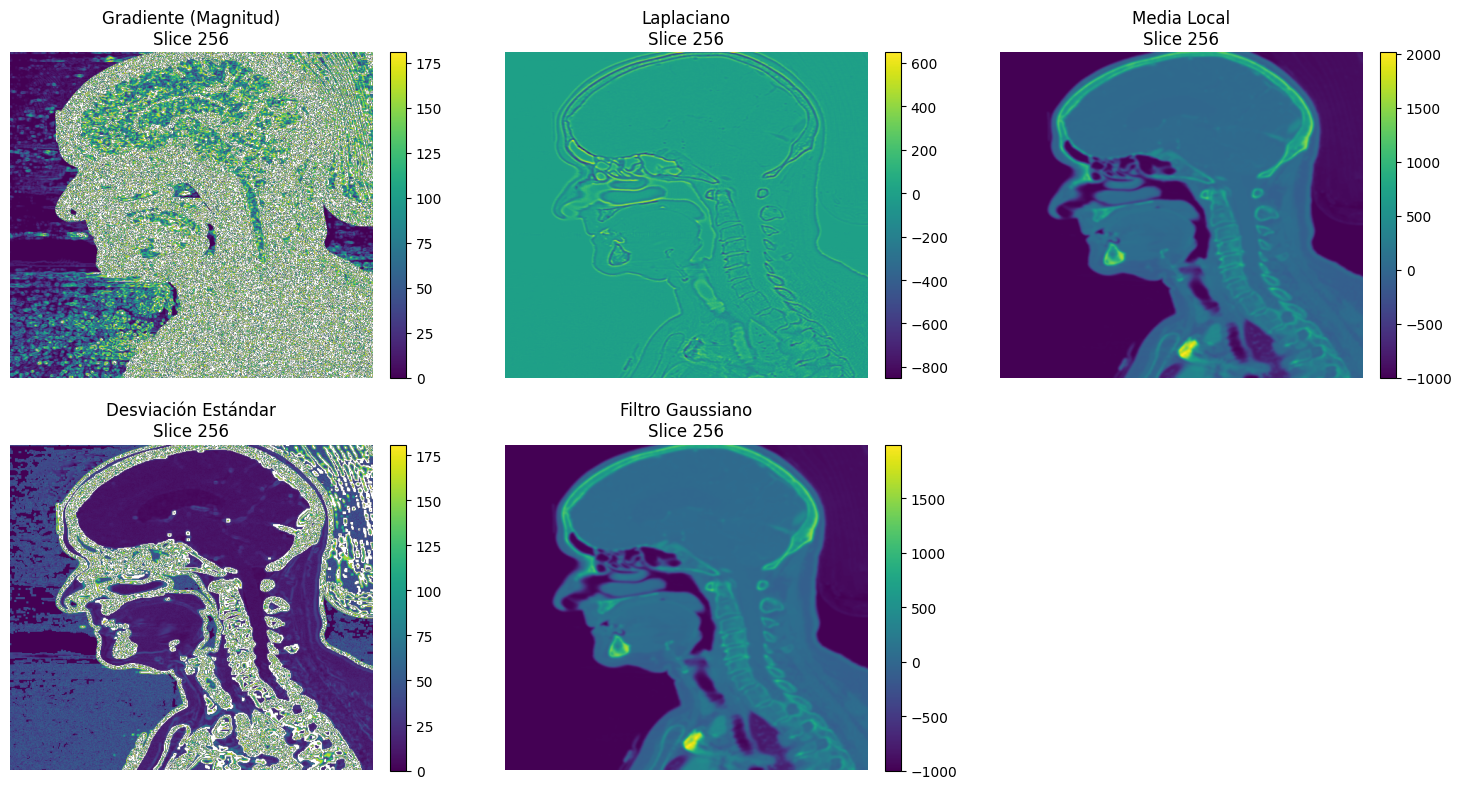


📈 ESTADÍSTICAS COMPARATIVAS
--------------------------------------------------


Característica            Forma        Mínimo       Máximo  \
0  Gradiente (Magnitud)  (460, 512, 512)           nan          nan   
1            Laplaciano  (460, 512, 512)  -9668.000000  8075.000000   
2           Media Local  (460, 512, 512)  -1000.000000  3095.000000   
3   Desviación Estándar  (460, 512, 512)           nan          nan   
4      Filtro Gaussiano  (460, 512, 512)  -1000.000000  3092.000000   

         Media         Std  
0          nan         nan  
1     0.000000   88.110566  
2  -647.494952  506.045838  
3          nan         nan  
4  -647.130818  504.449316


📊 DISTRIBUCIÓN DE VALORES


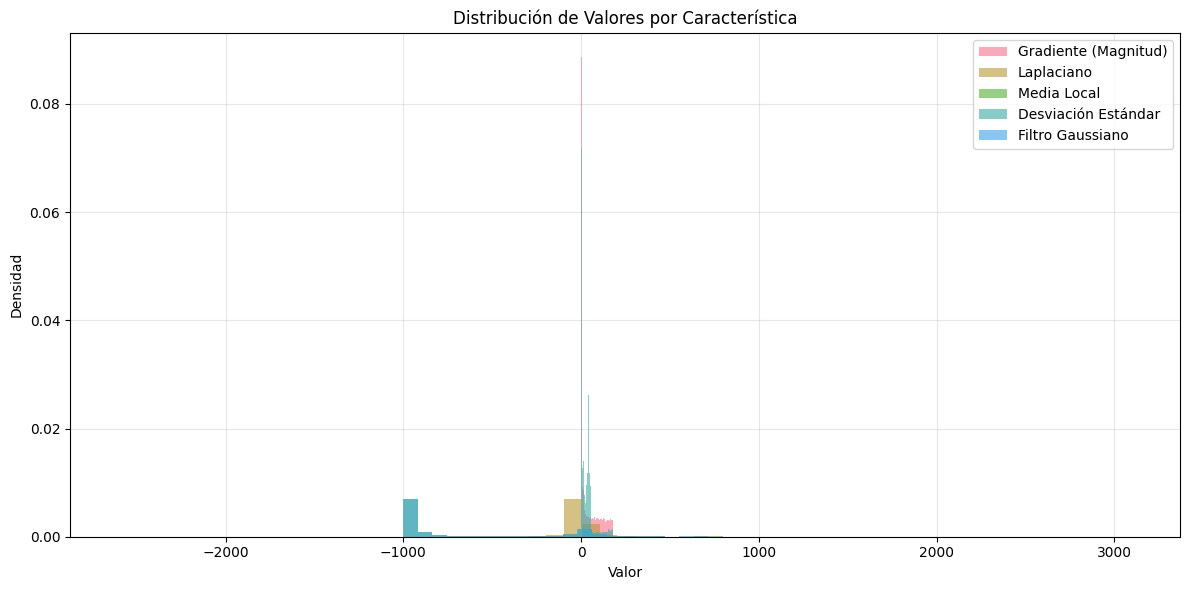

✅ Comparación de características completada
📊 Comparación de características completada


In [15]:
# Comparar diferentes características
medico.compare_features()

print("📊 Comparación de características completada")

## 📈 Análisis Estadístico

### Análisis de Distribuciones

📈 ANÁLISIS ESTADÍSTICO COMPLETO

🔍 ANÁLISIS DEL VOLUMEN ORIGINAL
------------------------------
  Dimensiones: (460, 512, 512)
  Tamaño total: 120586240
  Tipo de datos: int16
  Memoria (MB): 230.00
  Valor mínimo: -1000.000000
  Valor máximo: 3095.000000
  Media: -647.805906
  Mediana: -996.000000
  Desviación estándar: 510.023101
  Varianza: 260123.563293
  Asimetría: 1.210036
  Curtosis: 0.595614

🔬 ANÁLISIS POR CARACTERÍSTICA
------------------------------

📊 GRADIENT
  └─ Gx:
     Forma: (460, 512, 512)
     Tamaño: 120586240
     Memoria (MB): 230.00
     Mínimo: -32690.000000
     Máximo: 32672.000000
     Media: -16.596937
     Mediana: 0.000000
     Std: 1320.685175
     Varianza: 1744209.331821
     Percentil 25: -27.000000
     Percentil 75: 25.000000
     Asimetría: -0.706495
     Curtosis: 49.966756
  └─ Gy:
     Forma: (460, 512, 512)
     Tamaño: 120586240
     Memoria (MB): 230.00
     Mínimo: -31631.000000
     Máximo: 29898.000000
     Media: 3.117766
     Mediana: 0.

Nombre               Forma     Tamaño Memoria (MB)  \
0           gradient_Gx     (460, 512, 512)  120586240       230.00   
1           gradient_Gy     (460, 512, 512)  120586240       230.00   
2           gradient_Gz     (460, 512, 512)  120586240       230.00   
3    gradient_magnitude     (460, 512, 512)  120586240       460.00   
4             laplacian     (460, 512, 512)  120586240       230.00   
5      statistical_mean     (460, 512, 512)  120586240       230.00   
6       statistical_std     (460, 512, 512)  120586240       460.00   
7  statistical_variance     (460, 512, 512)  120586240       460.00   
8     gaussian_filtered     (460, 512, 512)  120586240       230.00   
9        umap_embedding  (460, 512, 512, 2)  241172480      1840.00   

          Mínimo        Máximo        Media      Mediana          Std  \
0  -32690.000000  32672.000000   -16.596937     0.000000  1320.685175   
1  -31631.000000  29898.000000     3.117766     0.000000  1183.917382   
2  -32571.000000  30356.000000    -0.632192     0.000000  1303.617435   
3            nan           nan          nan          nan          nan   
4   -4678.000000   7497.000000    -0.088245     0.000000    87.322098   
5   -1000.000000   3095.000000  -647.122705  -995.000000   506.399144   
6            nan           nan          nan          nan          nan   
7            nan           nan          nan          nan          nan   
8   -1000.000000   3066.000000  -647.102711  -994.000000   504.990168   
9     -13.528777     14.848132     1.968345     0.066439     1.904389   

         Varianza Percentil 25 Percentil 75  Asimetría    Curtosis  
0  1744209.331821   -27.000000    25.000000  -0.706495   49.966756  
1  1401660.367467   -17.000000    24.000000  -2.021407   57.345173  
2  1699418.417275   -21.000000    20.000000   0.068011   43.577583  
3             nan          nan          nan        nan         nan  
4     7625.148754    -2.000000     4.000000  -0.766276  435.578951  
5   256440.093486  -999.000000   -74.000000   1.179718    0.420995  
6             nan          nan          nan        nan         nan  
7             nan          nan          nan        nan         nan  
8   255015.069741  -999.000000   -75.000000   1.177583    0.411178  
9        3.626698     0.066439     3.871488  -0.002379   -1.947453


🔗 ANÁLISIS DE CORRELACIONES
------------------------------


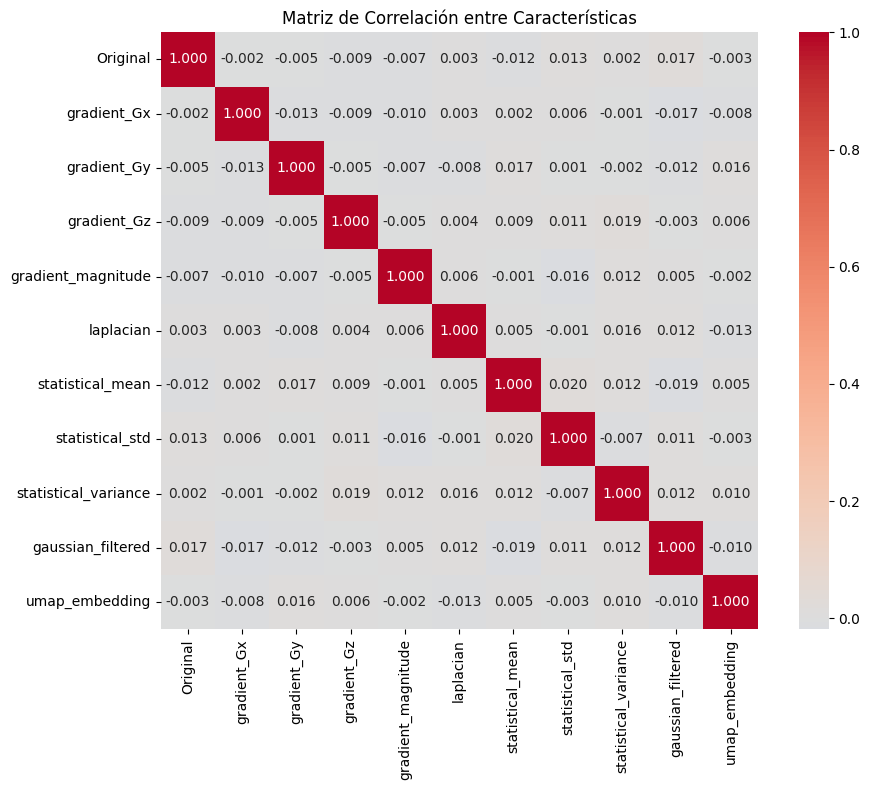

🔗 Correlaciones más significativas:
  No se encontraron correlaciones significativas (>0.1)

📊 ANÁLISIS DE DISTRIBUCIONES
------------------------------


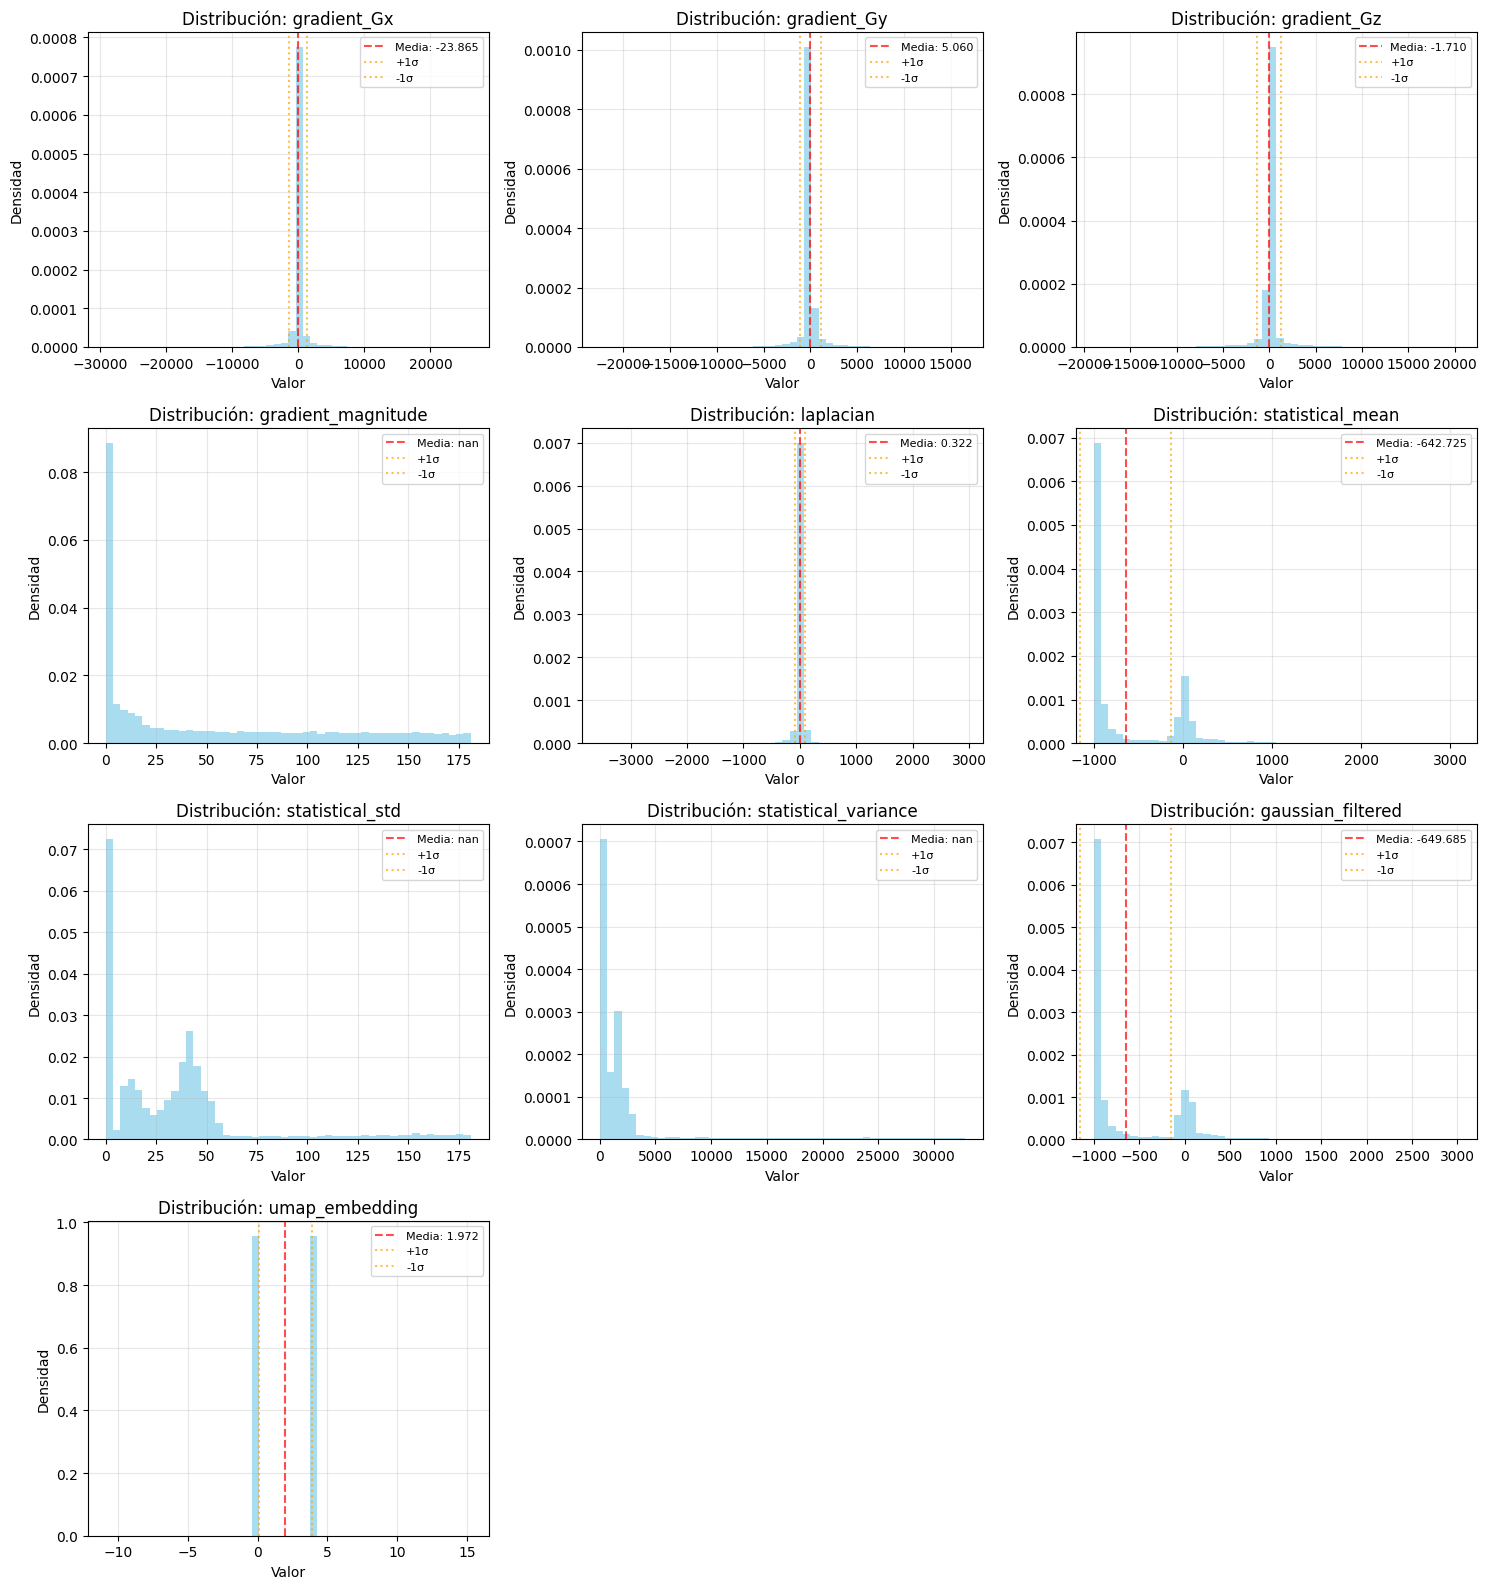


✅ Análisis estadístico completado
📈 Análisis estadístico completado


In [16]:
# Realizar análisis estadístico completo
medico.statistical_analysis()

print("📈 Análisis estadístico completado")

## 📋 Generación de Reportes

### Crear Reporte Completo

In [17]:
# Generar reporte completo
report = medico.generate_report()

print("📋 Reporte generado:")
print(report)

📋 Reporte generado:

        <div style="font-family: Arial, sans-serif; max-width: 800px;">
            <h1>🏥 Reporte Medico3D</h1>
            <hr>
            
            <h2>📋 Información del Volumen</h2>
            <table style="border-collapse: collapse; width: 100%;">
                <tr><td><b>Formato:</b></td><td>MetaImage</td></tr>
                <tr><td><b>Dimensiones:</b></td><td>(460, 512, 512)</td></tr>
                <tr><td><b>Tipo de datos:</b></td><td>int16</td></tr>
                <tr><td><b>Rango de valores:</b></td><td>[-1000.0000, 3095.0000]</td></tr>
                <tr><td><b>Valor medio:</b></td><td>-647.8059</td></tr>
                <tr><td><b>Desviación estándar:</b></td><td>510.0231</td></tr>
            </table>
            
            <h2>🔬 Características Calculadas</h2>
            <ul>
        <li><b>gradient:</b> 4 componentes (Gx, Gy, Gz, magnitude)</li><li><b>laplacian:</b> (460, 512, 512)</li><li><b>statistical:</b> 3 componentes (mean, std, 

## 💾 Guardar y Descargar Resultados

### Guardar Características Calculadas

In [18]:
# Guardar todas las características calculadas
medico.save_features('/content/medico3d_results')

print("💾 Características guardadas en /content/medico3d_results/")
print("📁 Archivos disponibles para descarga:")

import os
if os.path.exists('/content/medico3d_results'):
    for file in os.listdir('/content/medico3d_results'):
        if file.endswith(('.nii.gz', '.mha', '.txt', '.json')):
            size = os.path.getsize(f'/content/medico3d_results/{file}') / (1024*1024)
            print(f"   📄 {file} ({size:.2f} MB)")

💾 Guardando características en: /content/medico3d_results
✅ gradient_Gx.npy
✅ gradient_Gy.npy
✅ gradient_Gz.npy
✅ gradient_magnitude.npy
✅ laplacian.npy
✅ statistical_mean.npy
✅ statistical_std.npy
✅ statistical_variance.npy
✅ gaussian_filtered.npy
✅ umap_embedding.npy
✅ reporte.html
💾 Características guardadas en /content/medico3d_results/
📁 Archivos disponibles para descarga:


### Descargar Resultados

In [19]:
# Crear archivo ZIP con todos los resultados
import zipfile
import os

if os.path.exists('/content/medico3d_results'):
    print("📦 Creando archivo ZIP con resultados...")

    with zipfile.ZipFile('/content/medico3d_results.zip', 'w') as zipf:
        for root, dirs, files in os.walk('/content/medico3d_results'):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/content')
                zipf.write(file_path, arcname)

    zip_size = os.path.getsize('/content/medico3d_results.zip') / (1024*1024)
    print(f"✅ Archivo ZIP creado: medico3d_results.zip ({zip_size:.2f} MB)")
    print("💡 Puedes descargar el archivo desde el panel de archivos de Colab")

    # Mostrar comando para descarga
    print("\n📥 Para descargar automáticamente, ejecuta:")
    print("from google.colab import files")
    print("files.download('/content/medico3d_results.zip')")
else:
    print("❌ No se encontraron resultados para descargar")
    print("💡 Ejecuta las celdas de procesamiento primero")

📦 Creando archivo ZIP con resultados...
✅ Archivo ZIP creado: medico3d_results.zip (4600.00 MB)
💡 Puedes descargar el archivo desde el panel de archivos de Colab

📥 Para descargar automáticamente, ejecuta:
from google.colab import files
files.download('/content/medico3d_results.zip')


## 🚀 Análisis Avanzado

### Comparación de Rendimiento GPU vs CPU

In [20]:
# Comparar rendimiento GPU vs CPU
import time

if medico.volume is not None:
    print("⚡ Comparando rendimiento GPU vs CPU...")

    # Test con CPU
    start_time = time.time()
    medico.use_gpu = False
    medico.compute_gradient()
    cpu_time = time.time() - start_time

    # Test con GPU (si está disponible)
    gpu_time = None
    try:
        import cupy as cp
        start_time = time.time()
        medico.use_gpu = True
        medico.compute_gradient()
        gpu_time = time.time() - start_time
    except:
        print("💻 GPU no disponible para comparación")

    # Mostrar resultados
    print(f"\n📊 Resultados de rendimiento:")
    print(f"   💻 CPU: {cpu_time:.2f} segundos")
    if gpu_time:
        print(f"   🚀 GPU: {gpu_time:.2f} segundos")
        speedup = cpu_time / gpu_time
        print(f"   ⚡ Aceleración: {speedup:.1f}x más rápido con GPU")
else:
    print("❌ No hay volumen cargado para la comparación")

⚡ Comparando rendimiento GPU vs CPU...
🔄 Calculando gradiente...
✅ Gradiente calculado
🔄 Calculando gradiente...
✅ Gradiente calculado

📊 Resultados de rendimiento:
   💻 CPU: 10.30 segundos
   🚀 GPU: 0.82 segundos
   ⚡ Aceleración: 12.6x más rápido con GPU


### Optimización de Memoria

In [21]:
# Limpiar memoria y mostrar uso
import gc
import psutil

print("🧹 Limpiando memoria...")

# Limpiar memoria Python
gc.collect()

# Limpiar memoria GPU si está disponible
try:
    import cupy as cp
    cp.get_default_memory_pool().free_all_blocks()
    print("✅ Memoria GPU liberada")
except:
    pass

# Mostrar uso actual de memoria
memory = psutil.virtual_memory()
print(f"💾 Memoria RAM: {memory.percent:.1f}% usada")
print(f"💾 Disponible: {memory.available / (1024**3):.1f} GB")

print("\n💡 Consejos para optimizar memoria:")
print("   • Procesa volúmenes más pequeños")
print("   • Libera variables no necesarias con 'del variable'")
print("   • Ejecuta gc.collect() regularmente")

🧹 Limpiando memoria...
✅ Memoria GPU liberada
💾 Memoria RAM: 58.2% usada
💾 Disponible: 5.3 GB

💡 Consejos para optimizar memoria:
   • Procesa volúmenes más pequeños
   • Libera variables no necesarias con 'del variable'
   • Ejecuta gc.collect() regularmente


# Conclusión y Trabajo Futuro

Se ha desarrollado y demostrado con éxito un prototipo para la exploración interactiva de volúmenes médicos basado en un embedding de características acelerado por GPU. El uso de `cuML UMAP` y `Vedo` permite un rendimiento en tiempo real que no sería posible con herramientas basadas únicamente en CPU.

Como **trabajo futuro**, la línea de investigación más prometedora es la portabilidad de este desarrollo hacia el **Edge Computing**. El objetivo principal es adaptar y optimizar el pipeline computacional para su ejecución en hardware embebido de bajo consumo y costo. Esto incluye plataformas como las tarjetas de la serie `NVIDIA Jetson`, que cuentan con GPUs integradas compatibles con CUDA, o arquitecturas emergentes como RISC-V, representadas por tarjetas como las de la familia `Lichee Pi`.

Llevar esta capacidad de visualización avanzada al borde de la red (the edge) permitiría la creación de herramientas de diagnóstico portátiles y asequibles. Esta estrategia podría democratizar el acceso a la tecnología de renderizado 3D interactivo en entornos clínicos con recursos limitados, consultorios móviles o para la formación médica en cualquier lugar, desacoplando la dependencia de estaciones de trabajo de alto rendimiento.